# Inagural Project - IntroProg

We consider a utility maximization problem with the following model specifications

$L_M$, $L_F$ denotes hours worked by male and female respectively. $w_M$, $w_F$ is the wages for the workers. Hours worked at home are given by $H_M$, $H_F$. 

Consumption of market goods must satisfy the budget constraint, i.e.:

$$
C = w_ML_M+w_FL_f
$$

1. Illustrate how $H_F/H_M$ changes when varying $\alpha$

In [181]:
# We start by importing the solver class from the provided code

from HouseholdSpecializationModel import *

In [182]:
# Storing values in lists

alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1, 1.5]

# Creating empty list for HF/HM

H_div = []

# Looping through values of alpha, sigma and finding corresponding HF/HM

for i, j in zip(alpha_values, sigma_values):
    # Instantiating object to the Household Class
    optimize = HouseholdSpecializationModelClass()
    # Setting object attributes equal to the i,j values from the value lists
    optimize.par.alpha = i
    optimize.par.sigma = j
    # Defining optimize class method 
    opt = optimize.solve_discrete()
    # Calling optimize class method while appending the function values (divided) to the empty list
    np.array(H_div.append(opt.HF/opt.HM))

# Checing results
H_div

[0.3076923076923077, 1.0, 3.25]

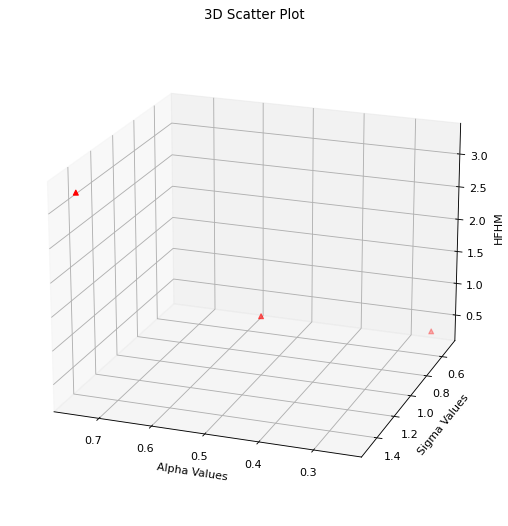

In [183]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with transparent background
fig = plt.figure(figsize=(10, 8), dpi=80, facecolor='none')

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the values
ax.scatter(alpha_values, sigma_values, H_div, marker='^', c='red')

# Set the labels and title
ax.set_xlabel('Alpha Values')
ax.set_ylabel('Sigma Values')
ax.set_zlabel('HFHM', rotation=90, fontsize=10) # rotate the z-label by 90 degrees and increase font size
ax.set_title('3D Scatter Plot')

# Add a dotted grid
ax.grid(True, linestyle='dotted')

# Set the viewing angle
ax.view_init(elev=20, azim=110)

# Show the plot
plt.show()

2. plot $log H_F/H_M$ against $log w_F/w_M$ for $w_F \in [0.8, 0.9, 1, 1.1, 1.2]$

In [184]:
import math

# Creating log list for H values 

logH = np.log(H_div)

array([-1.178655,  0.      ,  1.178655])

/var/folders/nv/80r8n0951fzckzlg35tkqjy80000gn/T/ipykernel_5325/3425289947.py:18: RuntimeWarning: invalid value encountered in double_scalars
  HF_HM_ratio.append(model.sol.HF_vec[-1] / model.sol.HM_vec[-1])


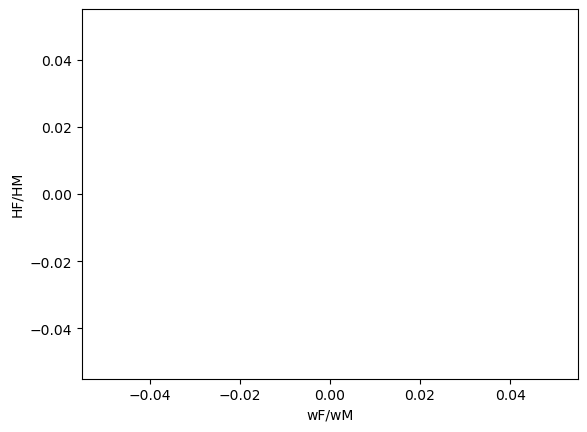

In [196]:
# create model instance
model = HouseholdSpecializationModelClass()

# solve model for each value of wF in [0.8, 0.9, 1, 1.1, 1.2]
HF_HM_ratio = []
wF_wM = []

for wF in model.par.wF_vec:
    model.par.wF = wF
    if not model.sol.HM_vec.any():
        # solve model discretely if not already solved
        model.solve_discrete()
    else:
        # use previous solution as initial guess
        sol_init = [model.sol.HM_vec[-1], model.sol.HF_vec[-1]]
        # solve model continuously with previous solution as initial guess
        model.solve(sol_init=sol_init)
    HF_HM_ratio.append(model.sol.HF_vec[-1] / model.sol.HM_vec[-1])
    wF_wM.append(wF / model.par.wM)

# plot HF/HM against wF/wM
plt.plot(wF_wM, HF_HM_ratio, 'o-')
plt.xlabel('wF/wM')
plt.ylabel('HF/HM')
plt.show()